# SWE3050-41, Group Activity 9, 3C
Use MNIST dataset (or another dataset) to perform the digit classification with one shallow learning model and one deep learning model (MLPClassifier in the sklearn library) in Colab. Compare their performance in terms of accuracy, precision, recall, and F1-score.

## 1. Train shallow & deep MLP, display the results

In [ ]:
# import important libraries
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# 1. Load MNIST
print("Loading MNIST...\nMNIST를 로딩하는 중...")
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

X = mnist.data
y = mnist.target.astype(int)

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Standardize features (important for MLP)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 2. Shallow Model (Single hidden layer)
print("\nTraining shallow MLP...\n얕은 다층 퍼셉트론을 훈련합니다...")
shallow_mlp = MLPClassifier(
    hidden_layer_sizes=(64,),    # one hidden layer with 64 neurons
    activation='relu',
    max_iter=300, # need 200-300 to fully converge
    early_stopping=True, # stop training automatically when the model stops improving
    learning_rate_init=0.001, # slow learning rate
    validation_fraction=0.1,
    random_state=42
)
shallow_mlp.fit(X_train, y_train)

y_pred_shallow = shallow_mlp.predict(X_test)

# 3. Deep Model (3 hidden layers)
print("\nTraining deep MLP...\n심층적인 다층 퍼셉트론을 훈련합니다...")
deep_mlp = MLPClassifier(
    hidden_layer_sizes=(128, 64, 32),   # deeper network
    activation='relu',
    max_iter=300, # need 200-300 to fully converge
    early_stopping=True, # stop training automatically when the model stops improving
    learning_rate_init=0.001, # slow learning rate
    validation_fraction=0.1,
    random_state=42
)
deep_mlp.fit(X_train, y_train)

y_pred_deep = deep_mlp.predict(X_test)

# 4. Evaluation
print("\n=== SHALLOW MLP PERFORMANCE 얕은 MLP 성능 ===")
print("Accuracy:", accuracy_score(y_test, y_pred_shallow))
print(classification_report(y_test, y_pred_shallow))

print("\n=== DEEP MLP PERFORMANCE 심층적인 MLP 성능 ===")
print("Accuracy:", accuracy_score(y_test, y_pred_deep))
print(classification_report(y_test, y_pred_deep))


Loading MNIST...
MNIST를 로딩하는 중...

Training shallow MLP...
얕은 다층 퍼셉트론을 훈련합니다...

Training deep MLP...
심층적인 다층 퍼셉트론을 훈련합니다...

=== SHALLOW MLP PERFORMANCE 얕은 MLP 성능 ===
Accuracy: 0.9675
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1343
           1       0.98      0.99      0.98      1600
           2       0.96      0.96      0.96      1380
           3       0.96      0.97      0.96      1433
           4       0.97      0.96      0.97      1295
           5       0.97      0.96      0.96      1273
           6       0.97      0.99      0.98      1396
           7       0.97      0.96      0.97      1503
           8       0.96      0.94      0.95      1357
           9       0.95      0.96      0.96      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000


=== DEEP MLP PERFORMANCE 심층적인 MLP 성능 ===
Accuracy: 0.97

## 2. Plot accuracy & loss curves

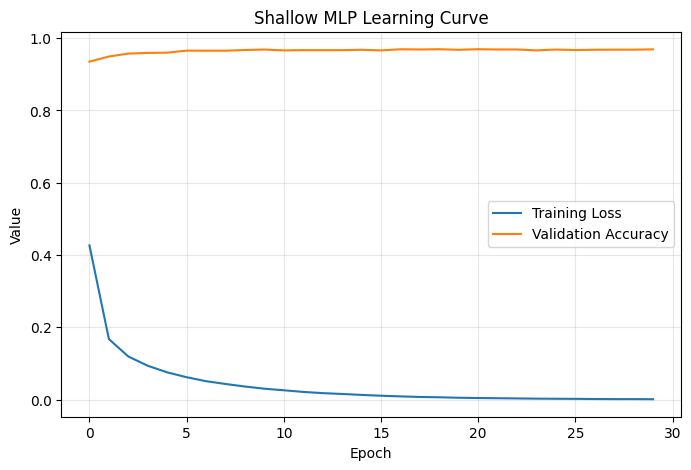

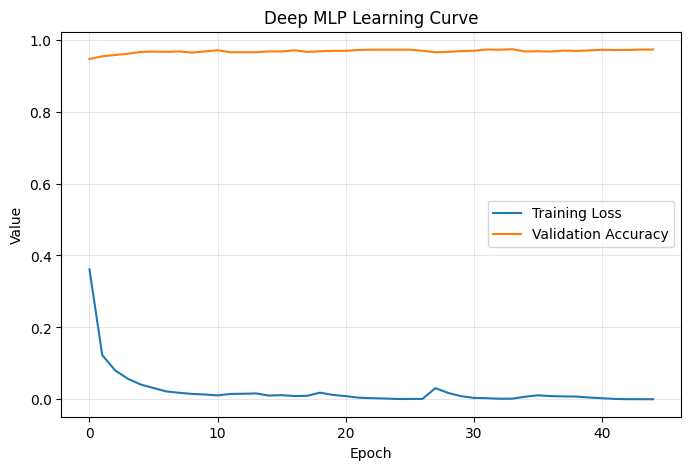

In [ ]:
import matplotlib.pyplot as plt

def plot_learning_curves(model, title):
    loss = model.loss_curve_
    val = model.validation_scores_ if hasattr(model, "validation_scores_") else None

    plt.figure(figsize=(8,5))
    plt.plot(loss, label="Training Loss")

    if val is not None:
        plt.plot(val, label="Validation Accuracy")

    plt.title(title)
    plt.xlabel("Epoch")
    plt.ylabel("Value")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

plot_learning_curves(shallow_mlp, "Shallow MLP Learning Curve")
plot_learning_curves(deep_mlp, "Deep MLP Learning Curve")

## 3. Compute confusion matrices

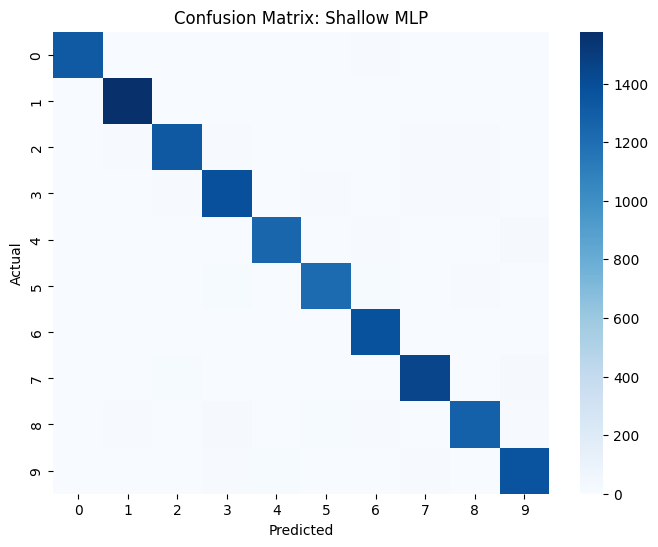

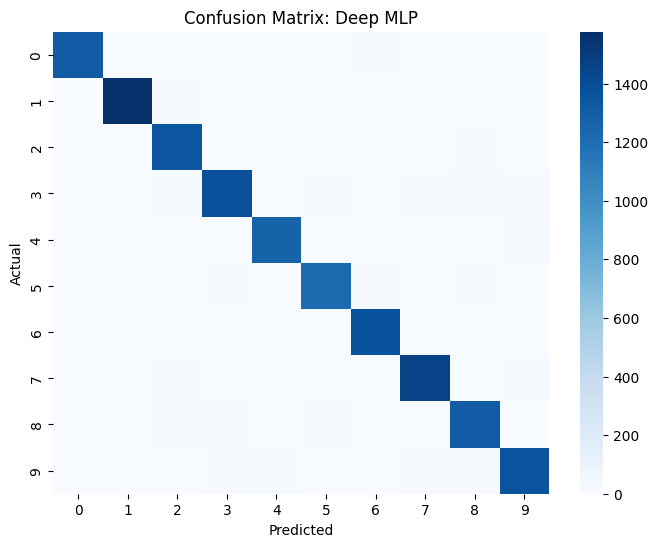

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=False, cmap="Blues")
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

plot_confusion(y_test, y_pred_shallow, "Confusion Matrix: Shallow MLP")
plot_confusion(y_test, y_pred_deep, "Confusion Matrix: Deep MLP")

## Model performance comparison

| Metric      | Shallow MLP | Deep MLP |
|-------------|-------------|----------|
| Accuracy    | 0.9675      | 0.9726   |
| Precision   | 0.97        | 0.97     |
| Recall      | 0.97        | 0.97     |
| F1-Score    | 0.97        | 0.97     |

### Summary
- The deep MLP shows a slight improvement in accuracy.
- Both models maintain balanced precision, recall, and F1-score.
